В этом домашнем задании вы будете решать задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_first_step_in_nlp/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделаем первичную обработку данных:

1) Выбросите колонку State

**Вопрос:** сколько столбцов осталось в матрице df?

In [2]:
df = df.drop(columns='State')

In [4]:
df.shape[1]

19

Сделаем простую кодировку признаков: 

2) Колонку International plan закодируем следующим образом: "Yes" замените на 1, а "No" на 0.

In [5]:
df['International plan'] = df['International plan'].map({'Yes' : 1, 'No' : 0})

Аналогичным образом закодируйте столбец Voice mail plan.

In [6]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

3) Переведем целевую переменную (Churn) в числа: True в 1, а False в 0.

In [7]:
df['Churn'] = df['Churn'].astype(int)

Выведите на экран первые строки измененной таблицы, чтобы проверить, что все преобразования сработали.

In [8]:
df.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [9]:
X_ = df.drop(columns='Churn')
y = df.loc[:, 'Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

**Вопрос:** сколько объектов относятся к классу 1?

In [10]:
y.sum()

483

Разбейте данные на тренировочную и тестовую части, размер тестовой части - 30%.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому 
отмасштабируйте признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

Для восстановления DataFrame-ов из преобразованных объектов используйте код с занятия.

In [11]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [20]:
X_train.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2016,-0.511937,1.740454,-0.324289,-0.612192,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1362,-0.939002,1.740454,-0.324289,-0.612192,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2670,0.392435,1.740454,-0.324289,1.633475,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378


In [21]:
X_test.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
438,0.317071,1.740454,-0.324289,-0.612192,-0.585483,-0.459145,-0.383285,-0.459202,2.554012,0.296151,2.553707,-0.221317,1.177171,-0.222641,1.167234,-0.589331,1.173159,-0.426563
2674,-0.838516,-0.515843,-0.324289,-0.612192,-0.585483,-1.301479,0.823467,-1.301214,0.323924,1.192675,0.324097,-0.240954,2.096363,-0.240096,0.916387,0.634624,0.920994,-1.176504
1345,-0.059751,-0.515843,-0.324289,-0.612192,-0.585483,-3.303627,-5.059450,-3.303691,-0.814761,1.491516,-0.813885,-0.659222,-0.610146,-0.659013,-1.233728,-1.405302,-1.229039,1.823260


In [22]:
X_train.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03
mean,-1.038365e-16,-7.548850e-16,-3.454397e-16,2.623039e-16,2.050082e-16,7.328519e-17,2.122415e-16,-3.401575e-16,-3.267377e-16,1.066442e-16,5.723859e-16,3.673777e-17,-1.641779e-18,3.331145e-16,-2.046751e-16,3.167443e-16,-6.954479e-16,-2.493600e-17
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-2.496533e+00,-6.820960e-01,-3.242891e-01,-6.121920e-01,-5.854825e-01,-3.255914e+00,-3.551009e+00,-3.256193e+00,-3.958950e+00,-4.983377e+00,-3.958979e+00,-3.484990e+00,-3.418787e+00,-3.486704e+00,-3.670526e+00,-1.813287e+00,-3.671052e+00,-1.176504e+00
25%,-6.877875e-01,-6.820960e-01,-3.242891e-01,-6.121920e-01,-5.854825e-01,-6.738579e-01,-6.346915e-01,-6.740232e-01,-6.807980e-01,-6.501792e-01,-6.817770e-01,-6.670772e-01,-7.122782e-01,-6.677409e-01,-6.245289e-01,-5.893313e-01,-6.185357e-01,-4.265631e-01
50%,-3.462950e-02,-5.158426e-01,-3.242891e-01,-6.121920e-01,-5.854825e-01,-1.320395e-02,1.896596e-02,-1.336769e-02,8.368249e-04,-2.689955e-03,1.939184e-03,1.040013e-02,2.648525e-03,8.635790e-03,2.050582e-02,-1.813462e-01,1.851113e-02,-4.265631e-01
75%,6.687715e-01,-5.158426e-01,-3.242891e-01,1.633475e+00,7.993992e-01,6.731420e-01,6.726234e-01,6.731959e-01,6.647413e-01,6.946062e-01,6.647962e-01,6.800227e-01,6.665091e-01,6.806488e-01,6.297053e-01,6.346242e-01,6.290144e-01,3.233779e-01
max,3.306525e+00,1.740454e+00,3.083668e+00,1.633475e+00,3.131832e+00,3.060672e+00,3.236972e+00,3.061055e+00,3.206097e+00,3.483791e+00,3.204976e+00,3.816055e+00,3.832613e+00,3.813800e+00,3.496526e+00,5.530446e+00,3.495725e+00,5.572965e+00


In [23]:
X_test.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.057466,0.036665,0.019915,0.030069,0.016139,-0.014949,-0.031366,-0.014941,0.001499,0.010011,0.001473,0.013198,0.027160,0.013257,-0.006550,0.047534,-0.006506,-0.014845
std,1.000143,1.020527,1.027429,1.015301,0.992298,0.998447,1.029705,0.998448,0.996942,0.973989,0.996913,0.976801,0.997386,0.976826,1.001529,1.012958,1.001294,0.954289
min,-2.496533,-0.682096,-0.324289,-0.612192,-0.585483,-3.303627,-5.059450,-3.303691,-3.344296,-2.692261,-3.344794,-3.082431,-3.265588,-3.080878,-3.670526,-1.813287,-3.671052,-1.176504
25%,-0.587302,-0.515843,-0.324289,-0.612192,-0.585483,-0.647248,-0.735254,-0.647036,-0.667500,-0.650179,-0.667871,-0.636149,-0.610146,-0.635013,-0.633488,-0.589331,-0.628490,-0.426563
50%,0.065856,-0.515843,-0.324289,-0.612192,-0.585483,0.000560,-0.031315,0.000666,0.028417,0.047117,0.027434,0.008436,0.002649,0.008636,0.020506,-0.181346,0.018511,-0.426563
75%,0.668771,1.740454,-0.324289,1.633475,0.945176,0.660296,0.672623,0.660242,0.702665,0.644799,0.702459,0.683459,0.666509,0.682831,0.701376,0.634624,0.695373,0.323378
max,3.582861,1.740454,3.083668,1.633475,2.767389,3.134078,3.136409,3.134462,2.764807,3.184950,2.764616,3.279965,3.373018,3.281426,3.102339,6.346416,3.097571,4.073083


Обучите на тренировочных данных с параметрами по умолчанию:

1) Логистическую регрессию

2) Метод ближайших соседей

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model_lr = LogisticRegression()

In [26]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
model_knc = KNeighborsClassifier()

In [28]:
model_knc.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
prediction_test_lr = model_lr.predict_proba(X_test)
prediction_test_knc = model_knc.predict_proba(X_test)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности.

**Вопрос:** чему равен ROC-AUC логистической регрессии, округленный до десятых?

In [70]:
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(y_test, [s[1] for s in prediction_test_lr]), roc_auc_score(y_test, [s[1] for s in prediction_test_knc])

(0.828242935594161, 0.8436324468996581)

## Бонус. Подбор гиперпараметров модели.

У моделей машинного обучения есть гиперпараметры - это величины, которые задает человек до начала обучения моделей. Подбор гиперпараметров может значительно влиять на качество моделей.

Про эту тему можно посмотреть [на Stepik](https://stepik.org/lesson/806516/step/4?unit=809692).

Теперь ваша цель - максимально улучшить модели. Для этого:

1) у логистической регрессии подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у метода ближайших соседей подберите число соседей n_neighbors (ищите значение гиперпараметра в диапазоне от 1 до 20 с шагом 1).

Подбор гиперпараметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [82]:
result_list_lr = []
for C in np.linspace(0.1, 10, 20):
    model_lr = LogisticRegression(C=C)
    model_lr.fit(X_train, y_train)
    prediction = model_lr.predict_proba(X_test)
    score = roc_auc_score(y_test, [s[1] for s in prediction])
    result_list_lr.append((C, score))

In [100]:
best_c_lr, best_score_lr = sorted(result_list_lr, key=lambda x: x[1], reverse=True)[0]

In [84]:
result_list_knc = []
for n in range(1,21,1):
    model_knc = KNeighborsClassifier(n_neighbors=n)
    model_knc.fit(X_train, y_train)
    prediction = model_knc.predict_proba(X_test)
    score = roc_auc_score(y_test, [s[1] for s in prediction])
    result_list_knc.append((n, score))

In [101]:
best_n_knc, best_score_knc = sorted(result_list_knc, key=lambda x: x[1], reverse=True)[0]

Какая модель справилась с решением задачи лучше всего по метрике roc_auc?

Нарисуйте roc-кривую для наилучшей модели.

In [96]:
import scikitplot as skplt
import matplotlib.pyplot as plt

Сравните между собой две лучшие модели:

1) насколько сильно отличается качество предсказания на тестовых данных?
(вычислите разность значений roc-auc на тестовых данных)

2) постройте гистограмму важности признаков для логистической регрессии. Какие три признака наиболее важны для модели?

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


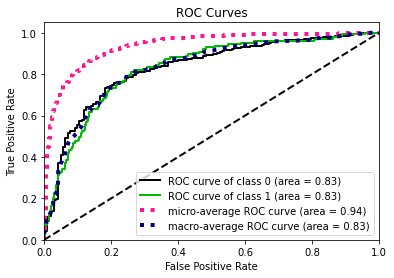

In [98]:
model_lr = LogisticRegression(C=best_c_lr)
model_lr.fit(X_train, y_train)
prediction_lr = model_lr.predict_proba(X_test)

y_true = y_test
y_probas = prediction_lr
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


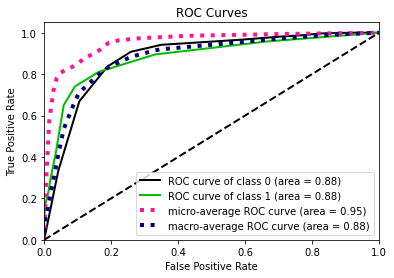

In [102]:
model_knc = KNeighborsClassifier(n_neighbors=best_n_knc)
model_knc.fit(X_train, y_train)
prediction_knc = model_knc.predict_proba(X_test)

y_true = y_test
y_probas = prediction_knc
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [138]:
import seaborn as sns

In [ ]:
importance_lr = sorted(list(zip(model_lr.coef_[0], X_train.columns)), key=lambda x:x[0], reverse=True)

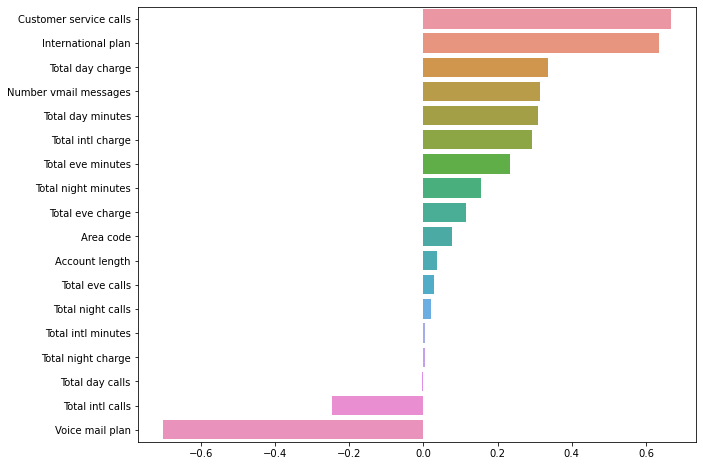

In [156]:
plt.figure(figsize=(10,8))
sns.barplot(y=[i[1] for i in importance_lr], x=[i[0] for i in importance_lr], orient="h")
plt.show()

Так можно строить гистограмму

In [ ]:
features = X.columns
importances = np.abs(lr.coef_[0])
indices = np.argsort(importances)

plt.title('Feature Importances of LogisticRegression')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Сделайте выводы:

1) Являются ли данные сбалансированными? Что это означает?

2) Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?